# EPL 2019-2020 Predicted Final Standings

The English Premier League (EPL) was halted in February following the pandemic caused by the novel coronavirus (COVID-19). The data used in this notebook contains all the available metrics from the season so far and it will be used to predict where each team will end up at the end of the season (if the season resumes). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
epl = pd.read_csv('../input/epl-stats-20192020/epl2020.csv')
epl.head()

,Unnamed: 0,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
0,1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
1,2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
3,4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


_Let's take a look at all the column headers_

In [3]:
print(epl.columns)

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')


Now that we have all the column names, we need to figure out which ones are important/relevant to our cause. But before that, let's visualize the data we already have and see what we can deduce from it.

In [4]:
# Get the list of teams first

teams = epl['teamId'].unique()


# Get the results for each team

results = []

for team in teams:
    team_data = epl[epl['teamId']==team]
    
    wins = team_data['wins'].sum()
    losses = team_data['loses'].sum()
    draws = team_data['draws'].sum()
    scored = team_data['scored'].sum()
    conceded = team_data['missed'].sum()
    
    games = wins+draws+losses
    points = (3*wins)+draws
    goal_difference = scored-conceded
    
    results.append([team,games,wins,draws,losses,scored,conceded,goal_difference,points])
    
league_table = pd.DataFrame(results, columns = ['Team','P','W','D','L','GF','GA','GD','Points'])
league_table.sort_values(by=['Points', 'GD', 'GF'], ascending=False, inplace=True, ignore_index=True)

league_table.set_index(np.array(range(1,21)),inplace=True)
league_table.head(20)
    

,Team,P,W,D,L,GF,GA,GD,Points
1,Liverpool,29,27,1,1,66,21,45,82
2,Man City,28,18,3,7,68,31,37,57
3,Leicester,29,16,5,8,58,28,30,53
4,Chelsea,29,14,6,9,51,39,12,48
5,Man Utd,29,12,9,8,44,30,14,45
6,Wolves,29,10,13,6,41,34,7,43
7,Sheffield United,28,11,10,7,30,25,5,43
8,Tottenham,29,11,8,10,47,40,7,41
9,Arsenal,28,9,13,6,40,36,4,40
10,Burnley,29,11,6,12,34,40,-6,39


These are the current standings (as of 13th May, 2020). 

### Let's look at the expected points and see where the teams 'should've been' placed on the table.

In [5]:
xpoints_teams = []

for team in teams:
    team_data = epl[epl['teamId']==team]
    
    xp = team_data['xpts'].sum()
    
    xpoints_teams.append([team, xp])
    
xp_league_table = pd.DataFrame(xpoints_teams, columns = ['Team','xPoints'])

xp_league_table.sort_values(ascending = False, by = ['xPoints'], inplace=True, ignore_index = True)
xp_league_table.set_index(np.array(range(1,21)),inplace=True)
xp_league_table.head(20)


,Team,xPoints
1,Man City,63.2076
2,Liverpool,59.8127
3,Chelsea,55.5476
4,Man Utd,52.1008
5,Wolves,49.2557
6,Leicester,47.6633
7,Everton,46.6459
8,Southampton,41.0947
9,Burnley,39.5687
10,Sheffield United,39.0611


These are the 'expected' positions of the teams in the league. Various teams seem to be underperforming as can be seen in the example of __Man Utd__. They currently sit at the 5th position with 45 points, but were _expected_ to be at the 4th position with 52 points. Similarly, __Tottenham__ seem to be overachieving: they were _expected_ to be 12th in the table with 37 points; however, they sit at the 8th position with 41. __Liverpool__ seem to be MASSIVELY overachiveing, with their expected points tally to be 59, but actual tally being 82.

Lets see this for all the teams on whether or not they are underperforming.

In [6]:
performance = []

for team in teams:
    current_pos = league_table[league_table['Team']==team].index[0]
    x_pos = xp_league_table[xp_league_table['Team']==team].index[0]
    underperforming = ''
    if current_pos>x_pos:
        underperforming = 'Yes'
    else:
        underperforming = 'No'
    
    performance.append([team,x_pos,current_pos, underperforming])
    
position_table = pd.DataFrame(performance, columns = ['Team','Expected Position','Current Position', 'Underperforming'])
position_table.sort_values(ascending=True, by = ['Expected Position'], ignore_index = True, inplace=True)
position_table.head(20)

,Team,Expected Position,Current Position,Underperforming
0,Man City,1,2,Yes
1,Liverpool,2,1,No
2,Chelsea,3,4,Yes
3,Man Utd,4,5,Yes
4,Wolves,5,6,Yes
5,Leicester,6,3,No
6,Everton,7,12,Yes
7,Southampton,8,14,Yes
8,Burnley,9,10,Yes
9,Sheffield United,10,7,No


## How are the teams' recent performances?

Here, we will look at the last few results of the teams. It is important as this will give us an idea of the direction the teams were going - which will help us predict where they might end up at the end of the season. I will look at the 5 most recent results for each team.

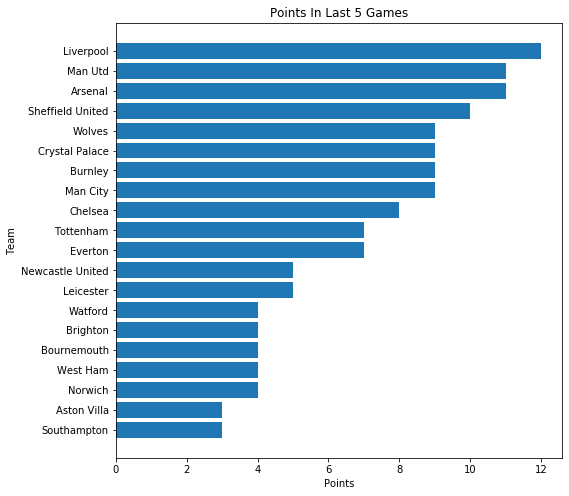

In [7]:
recent_results = []

for team in teams:
    team_data = epl[epl['teamId']==team].tail(5)
    
    wins = team_data['wins'].sum()
    draws = team_data['draws'].sum()
    
    points = (3*wins)+draws
    
    recent_results.append([team, points])
    
recent_results.sort(key=lambda x: x[1])

plt.figure(figsize = (8, 8))
plt.barh(range(20), [x[1] for x in recent_results])
plt.xlabel('Points')
plt.ylabel('Team')
plt.title('Points In Last 5 Games')
plt.yticks(range(20), [x[0] for x in recent_results])
plt.show()

## If they continue their form, where will they end up?

In [8]:
team_points = []

# Add recent points per game to table
for team in teams:
    points_per_game = [x for x in recent_results if x[0] == team][0][1] / 5
    team_data = league_table[league_table['Team'] == team].iloc[0]
    games_to_play = 38 - team_data['P']
    new_points = int(team_data['Points'] + round(points_per_game * games_to_play))
    team_points.append([team, new_points])

predicted_table = pd.DataFrame(team_points, columns=['Team', 'Points'])
predicted_table.sort_values(by=['Points'], ascending=False, inplace=True, ignore_index=True)
predicted_table.set_index(np.array(range(1,21)), inplace=True)
predicted_table.head(20)

,Team,Points
1,Liverpool,104
2,Man City,75
3,Man Utd,65
4,Sheffield United,63
5,Leicester,62
6,Chelsea,62
7,Arsenal,62
8,Wolves,59
9,Burnley,55
10,Crystal Palace,55
